In [1]:
import snntorch as snn
import sys
import platform
import torch
import pandas as pd
import sklearn as sk
import numpy as np

has_gpu = torch.cuda.is_available()
has_mps = getattr(torch,'has_mps',False)
device = "mps" if getattr(torch,'has_mps',False) \
    else "gpu" if torch.cuda.is_available() else "cpu"

print(f"Python Platform: {platform.platform()}")
print(f"PyTorch Version: {torch.__version__}")
print()
print(f"Python {sys.version}")
print(f"Pandas {pd.__version__}")
print(f"Scikit-Learn {sk.__version__}")
print("GPU is", "available" if has_gpu else "NOT AVAILABLE")
print("MPS (Apple Metal) is", "AVAILABLE" if has_mps else "NOT AVAILABLE")
print(f"Target device is {device}")

Python Platform: macOS-13.1-arm64-arm-64bit
PyTorch Version: 2.0.0.dev20230210

Python 3.9.16 | packaged by conda-forge | (main, Feb  1 2023, 21:38:11) 
[Clang 14.0.6 ]
Pandas 1.5.3
Scikit-Learn 1.2.1
GPU is NOT AVAILABLE
MPS (Apple Metal) is AVAILABLE
Target device is mps


In [2]:
# imports
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen

import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt

<img src="https://github.com/jeshraghian/snntorch/blob/master/docs/_static/img/examples/tutorial2/2_1_neuronmodels.png?raw=true">

3 main types of neuron models:
1. **Hodgkin-Huxley Neuron Models:**
    - While biophysical models can reproduce electrophysiological results with a high degree of accuracy, their complexity makes them difficult to use at present.
2. **Artificial Neuron Model:**
    - inputs are multiplied by their corresponding weights and passed through an activation function
    - This simplification has enabled deep learning researchers to perform incredible feats in computer vision, natural language processing, and many other machine learning-domain tasks
3. **Leaky Integrate-and-Fire Neuron Models:**
    - Takes sum of weighted inputs similar to artificial neurons, but instead of directly passing through an activation function, the weighted sum is integrated over time with leakage, similar to an RC circuit
    - neurons emit a voltage spike when the integrated value exceeds a threshold
    - LIF neurons abstract way the shape and profile of the output spike; it is simply treated as a discrete event. 
    - information is not stored within the spike, but rather the frequency of spikes
    - LIF neuron sits in between biological plausibility of Hodgkin-Huxley models and the practicality of artificial neurons

<img src="https://github.com/jeshraghian/snntorch/blob/master/docs/_static/img/examples/tutorial2/2_2_intuition.png?raw=true">

<img src="https://github.com/jeshraghian/snntorch/blob/master/docs/_static/img/examples/tutorial2/2_4_RCmembrane.png?raw=true">

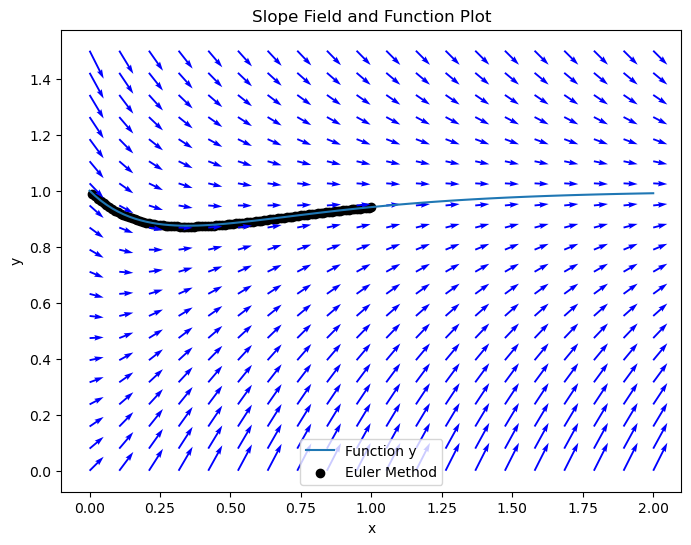

In [3]:
def eulers_method(dx, x0, y0, h, n):
  solutions = []
  for i in range(n):
    m = dx(x0, y0)
    y1 = y0 + m*h
    x1 = x0 + h
    solutions.append([m, x1, y1])
    y0 = y1 
    x0 = x1 
  return solutions 
    
import math

def dx(x, y):
  return 2-math.exp(-4*x)-2*y

solutions = eulers_method(dx, 0, 1, 0.01, 100)

# print(solutions)

import numpy as np
import matplotlib.pyplot as plt
import math

# Define the function
def f(x):
    return 1 + 0.5*np.exp(-4*x) - 0.5*np.exp(-2*x)

# Define the differential equation
def dydx(x, y):
    return 2 - np.exp(-4*x) - 2*y

# Create a list of x values
x = np.linspace(0, 2, 100)

# Evaluate the function on the list of x values
y = f(x)

# Create a plot
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x, y, label='Function y')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Slope Field and Function Plot')
ax.legend()

# Extract x and y values from the list of points
x_vals = [p[1] for p in solutions]
y_vals = [p[2] for p in solutions]

# Plot the points using the scatter() function
ax.scatter(x_vals, y_vals, color='black', label='Euler Method')

# Add a legend
ax.legend()

# Create a grid of x and y values for the slope field
X, Y = np.meshgrid(np.linspace(0, 2, 20), np.linspace(0, 1.5, 20))

# Compute the slope field
U = np.ones_like(X)
V = dydx(X, Y)

# Add the slope field to the plot
ax.quiver(X, Y, U, V, color='blue', angles='xy', scale_units='xy', scale=20)

# Show the plot
plt.show()

    